<a href="https://colab.research.google.com/github/JonathanCornish/machine-learning-challenge/blob/master/ML_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
# Read the CSV and Perform Basic Data Cleaning

In [11]:
# Upload the raw csv data file
# df = pd.read_csv("exoplanet_data.csv")
# print the columns to see what we're working with
# print(df.columns)
from google.colab import files
uploaded = files.upload()

Saving exoplanet_data.csv to exoplanet_data.csv


In [12]:
# Upload the data file & get the names of all the columns
import io
df = pd.read_csv(io.BytesIO(uploaded['exoplanet_data.csv']))
print(df.columns)

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')


In [13]:
# Show how many column headers there are
print(len(df.columns))

41


In [14]:
# count the number of invalid rows within each column
df.isna().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [15]:
# Drop the null columns where all values are null (this step is unnecessary, as you can above...)
df = df.dropna(axis='columns', how='all')
# Drop the null rows (this step is unnecessary, as you can above...)
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [16]:
print(len(df.columns))

41


In [0]:
# Select Features (columns)

In [18]:
# Set features. This will also be used as our x values.
selected_features = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_time0bk'
                       , 'koi_depth', 'koi_duration', 'ra', 'dec', 'koi_steff', 'koi_teq', 'koi_insol', 'koi_prad']]
selected_features

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_time0bk,koi_depth,koi_duration,ra,dec,koi_steff,koi_teq,koi_insol,koi_prad
0,CONFIRMED,0,0,0,0,162.513840,874.8,4.50700,291.93423,48.141651,5455,443,9.11,2.83
1,FALSE POSITIVE,0,1,0,0,175.850252,10829.0,1.78220,297.00482,48.134129,5853,638,39.30,14.60
2,FALSE POSITIVE,0,1,0,0,170.307565,8079.2,2.40641,285.53461,48.285210,5805,1395,891.96,33.46
3,CONFIRMED,0,0,0,0,171.595550,603.3,1.65450,288.75488,48.226200,6031,1406,926.16,2.75
4,CONFIRMED,0,0,0,0,172.979370,686.0,3.14020,296.28613,48.224670,6046,1160,427.65,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,132.016100,87.7,4.80600,298.74921,46.973351,5638,929,176.40,1.11
6987,FALSE POSITIVE,0,1,1,0,131.705093,1579.2,3.22210,297.18875,47.093819,5638,2088,4500.53,29.35
6988,CANDIDATE,0,0,0,0,133.001270,48.5,3.11400,286.50937,47.163219,6119,1608,1585.81,0.72
6989,FALSE POSITIVE,0,0,1,0,132.181750,103.6,0.86500,294.16489,47.176281,6173,2218,5713.41,1.07


In [0]:
# Create a Train Test Split

# Use `koi_disposition` for the y values

In [0]:
train_dataset = selected_features.sample(frac=0.8,random_state=0)
test_dataset = selected_features.drop(train_dataset.index)

In [21]:
# Showing some stats of the dataframe so you can get a sense of the data we're working with
train_stats = train_dataset.describe()
# train_stats.pop("koi_disposition")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
koi_fpflag_nt,5593.0,0.153048,0.360066,0.000000,0.000000,0.00000,0.000000,1.000000e+00
koi_fpflag_ss,5593.0,0.247095,0.431361,0.000000,0.000000,0.00000,0.000000,1.000000e+00
koi_fpflag_co,5593.0,0.203290,0.402482,0.000000,0.000000,0.00000,0.000000,1.000000e+00
koi_fpflag_ec,5593.0,0.124084,0.329706,0.000000,0.000000,0.00000,0.000000,1.000000e+00
koi_time0bk,5593.0,164.256045,67.361463,120.515914,132.689100,136.62586,169.716290,1.472522e+03
koi_depth,5593.0,23839.130699,82390.321679,7.500000,160.400000,420.90000,1504.200000,1.541400e+06
koi_duration,5593.0,5.522145,6.488184,0.186600,2.430500,3.74500,6.124500,1.385400e+02
ra,5593.0,292.065795,4.772155,279.856080,288.660770,292.27374,295.880280,3.017208e+02
dec,5593.0,43.808902,3.630592,36.577381,40.774529,43.69054,46.717819,5.233601e+01
koi_steff,5593.0,5699.106919,800.772124,2661.000000,5309.000000,5758.00000,6108.000000,1.589600e+04


In [0]:
# Separate the target value, or "label", from the features. This label is the value that we will train the model to predict
train_labels = train_dataset.pop('koi_disposition')
test_labels = test_dataset.pop('koi_disposition')

In [23]:
# show the test labels
test_labels

0            CONFIRMED
7            CONFIRMED
21           CONFIRMED
24      FALSE POSITIVE
25           CONFIRMED
             ...      
6968    FALSE POSITIVE
6970    FALSE POSITIVE
6971    FALSE POSITIVE
6977    FALSE POSITIVE
6988         CANDIDATE
Name: koi_disposition, Length: 1398, dtype: object

In [24]:
# show the target labels
train_labels

4990    FALSE POSITIVE
1425         CONFIRMED
144          CONFIRMED
6589    FALSE POSITIVE
4443         CANDIDATE
             ...      
4112         CANDIDATE
2020         CANDIDATE
6233         CANDIDATE
367     FALSE POSITIVE
5502    FALSE POSITIVE
Name: koi_disposition, Length: 5593, dtype: object

In [25]:
# show the unique labels for test data
test_labels.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [26]:
# show the unique labels for training data to confirm they are the same as the test data labels
train_labels.unique()

array(['FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode training data labels
label_encoder = LabelEncoder()
label_encoder.fit(train_labels)
encoded_train_labels = label_encoder.transform(train_labels)
# Step 2: Label-encode test data labels
label_encoder = LabelEncoder()
label_encoder.fit(test_labels)
encoded_test_labels = label_encoder.transform(test_labels)

In [0]:
# from keras.utils import to_categorical
# encoded_train_labels = to_categorical(train_labels)

# from keras.utils import to_categorical
# encoded_test_labels = to_categorical(test_labels)

In [33]:
# Showing the result of label-encoding:
for encoded_label, original_label in zip(encoded_train_labels, train_labels):
    print('Original Label: ' + str(original_label))
    print('Encoded Label: ' + str(encoded_label))
    print('-' * 12)

Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CONFIRMED
Encoded Label: 1
------------
Original Label: CONFIRMED
Encoded Label: 1
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CANDIDATE
Encoded Label: 0
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CONFIRMED
Encoded Label: 1
------------
Original Label: CONFIRMED
Encoded Label: 1
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CANDIDATE
Encoded Label: 0
------------
Original Label: CANDIDATE
Encoded Label: 0
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: CANDIDATE
Encoded Label: 0
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Original Label: FALSE POSITIVE
Encoded Label: 2
------------
Ori

In [0]:
# As you can see, we did not do hot-popping (or whatever that is called...)

In [41]:
print(len(encoded_train_labels[encoded_train_labels == 0]))
print(len(encoded_train_labels[encoded_train_labels == 1]))
print(len(encoded_train_labels[encoded_train_labels == 2]))

1367
1441
2785


In [42]:
print(len(encoded_train_labels))

5593


In [43]:
train_dataset.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_time0bk,koi_depth,koi_duration,ra,dec,koi_steff,koi_teq,koi_insol,koi_prad
4990,1,0,0,0,230.300100,1885.0,12.5880,285.20850,49.207829,4665,182,0.26,2.98
1425,0,0,0,0,132.061500,284.2,1.1966,290.43402,44.107651,3810,806,99.80,0.86
144,0,0,0,0,135.080841,391.6,1.8876,292.87338,42.966141,5427,1253,583.01,1.86
6589,1,0,0,0,214.239100,631.0,10.5300,290.47623,49.202610,5511,190,0.31,2.24
4443,0,0,0,0,144.096840,125.2,1.7060,289.09619,39.827278,6116,584,27.51,1.54


In [0]:
# Pre-processing

# Scale the data using the MinMaxScaler and perform some feature selection
# note I decided to normalize using essentially a z-score, rather than using the MinMaxScaler function...

In [0]:
# Normalize the data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [47]:
normed_train_data

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_time0bk,koi_depth,koi_duration,ra,dec,koi_steff,koi_teq,koi_insol,koi_prad
4990,2.352209,-0.572826,-0.505090,-0.376346,0.980443,-0.266465,1.089034,-1.436939,1.487065,-1.291387,-1.091363,-0.069977,-0.033981
1425,-0.425056,-0.572826,-0.505090,-0.376346,-0.477937,-0.285894,-0.666680,-0.341937,0.082287,-2.359107,-0.345467,-0.068798,-0.034528
144,-0.425056,-0.572826,-0.505090,-0.376346,-0.433114,-0.284591,-0.560179,0.169229,-0.232128,-0.339806,0.188853,-0.063080,-0.034270
6589,2.352209,-0.572826,-0.505090,-0.376346,0.742013,-0.281685,0.771842,-0.333092,1.485628,-0.234907,-1.081800,-0.069976,-0.034172
4443,-0.425056,-0.572826,-0.505090,-0.376346,-0.299269,-0.287824,-0.588168,-0.622278,-1.096687,0.520614,-0.610833,-0.069654,-0.034352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,-0.425056,-0.572826,-0.505090,-0.376346,-0.451218,-0.288991,-0.435738,1.065145,0.685301,-0.254888,-0.075318,-0.066805,-0.034618
2020,-0.425056,-0.572826,-0.505090,-0.376346,0.396026,-0.281292,0.508148,0.035440,-0.247740,0.039828,-0.896521,-0.069940,-0.034151
6233,-0.425056,-0.572826,-0.505090,-0.376346,-0.428090,-0.288097,-0.323225,-0.241139,-0.776844,0.163459,-0.276136,-0.068420,-0.034517
367,-0.425056,1.745419,1.979491,2.656655,2.866117,-0.160397,-0.094425,0.614302,0.141158,-0.196194,-0.170946,-0.067682,-0.025177


In [0]:
# Build & Define the Model
def build_model():
  model = keras.Sequential([
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Flatten(),
    layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dense(3)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)
  # optimizer = tf.train.AdamOptimizer()
  # loss = tf.keras.losses.CategoricalCrossentropy()
  loss = 'sparse_categorical_crossentropy'

# may have to use 'SparseCategoricalCrossentropy' to do this, bc sparse_categorical_crossentropy expects
# the format of the labels to be One Hot Encoding...
# Compile the Model
  model.compile(loss=loss,
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [0]:
model = build_model()

In [83]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                896       
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 195       
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [84]:
# checking to see if the model is working (it appears to be...)
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.03469385,  0.01130654,  0.00662225],
       [-0.03244333,  0.0101577 ,  0.01642936],
       [-0.02583162,  0.01531778,  0.01204207],
       [-0.03189836,  0.01057631,  0.00843934],
       [-0.02887682,  0.01300823,  0.01026105],
       [-0.03884437,  0.01027251,  0.02072719],
       [-0.03586628,  0.00037115,  0.03127217],
       [-0.02914188,  0.00659039,  0.01257801],
       [-0.03610444,  0.01528333,  0.01591173],
       [-0.03481893,  0.00802374,  0.01791345]], dtype=float32)

In [0]:
# Train the Model

In [86]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, encoded_train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch: 0, acc:0.6167,  loss:1.4595,  val_acc:0.5022,  val_loss:0.7969,  
....................................................................................................
Epoch: 100, acc:0.4906,  loss:0.8872,  val_acc:0.4835,  val_loss:0.8954,  
....................................................................................................
Epoch: 200, acc:0.5447,  loss:0.8327,  val_acc:0.5469,  val_loss:0.8316,  
....................................................................................................
Epoch: 300, acc:0.6594,  loss:0.7870,  val_acc:0.6667,  val_loss:0.8013,  
....................................................................................................
Epoch: 400, acc:0.6135,  loss:0.7934,  val_acc:0.6265,  val_loss:0.8133,  
....................................................................................................
Epoch: 500, acc:0.4969,  lo

In [87]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
995,0.702287,0.497094,0.729703,0.503128,995
996,0.702287,0.497094,0.729704,0.503128,996
997,0.702287,0.497094,0.729704,0.503128,997
998,0.702042,0.496871,0.725785,0.502234,998
999,0.691014,0.496647,0.719033,0.502234,999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'Loss [Planet Classifications]')

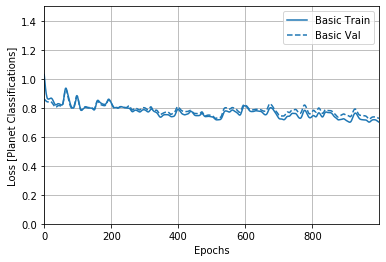

In [90]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1.5])
plt.ylabel('Loss [Planet Classifications]')

Text(0, 0.5, 'Accuracy [Planet Classifications]')

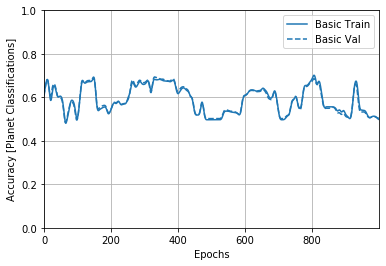

In [92]:
plotter.plot({'Basic': history}, metric = "acc")
plt.ylim([0, 1])
plt.ylabel('Accuracy [Planet Classifications]')

In [0]:
# As we can see, this is classic overfitting/it isn't working.!!!
# So, let's update the model to stop early once the val_loss is clearly degrading...

In [94]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

early_history = model.fit(normed_train_data, encoded_train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, acc:0.4685,  loss:1.1794,  val_acc:0.4861,  val_loss:1.0783,  
.....................

Text(0, 0.5, 'Loss [Planet Classifications]')

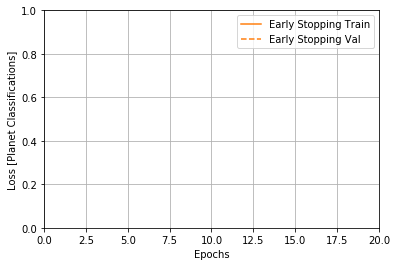

In [98]:
plotter.plot({'Early Stopping': early_history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('Loss [Planet Classifications]')

In [0]:
# not sure why the above isn't showing up...

Text(0, 0.5, 'Accuracy [Planet Classifications]')

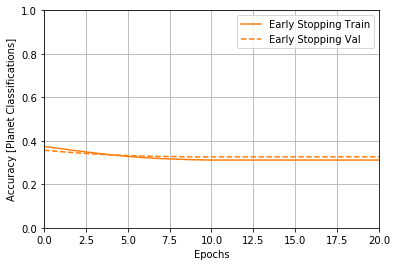

In [101]:
plotter.plot({'Early Stopping': early_history}, metric = "acc")
plt.ylim([0, 1])
plt.ylabel('Accuracy [Planet Classifications]')

In [0]:
# Hyperparameter Tuning

# Use `GridSearchCV` to tune the model's parameters

In [0]:
# Create the GridSearchCV model

In [0]:
# Train the model with GridSearch

In [0]:
# print(grid2.best_params_)
# print(grid2.best_score_)

In [0]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)